In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)
warnings.simplefilter(action = 'ignore', category = UserWarning)

#### Loading the dataset

In [ ]:
data = pd.read_csv("/content/Wine_clust .csv")

In [ ]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
data.shape

(178, 13)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [ ]:
data.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [ ]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


## PCA

In [ ]:
from sklearn.decomposition import PCA

#### Reducing the data features to 2 components

In [ ]:
pca = PCA(n_components = 2)
df = pca.fit_transform(data)
df = pd.DataFrame(df, columns = ['PCA1', 'PCA2'])
df.head(10)

,PCA1,PCA2
0,318.562979,21.492131
1,303.097420,-5.364718
2,438.061133,-6.537309
3,733.240139,0.192729
4,-11.571428,18.489995
5,703.231192,-0.332159
6,542.971581,-13.518967
7,548.401860,11.449432
8,298.036863,-8.180158
9,298.049553,-7.101543


## K-Means Clustering

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
x = df.values

In [ ]:
data1 = df.copy()

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
def kmeanscluster(x):
    wcss = []
    for i in range(1,11):
        kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
        kmeans.fit(x)
        wcss.append(kmeans.inertia_)
    plt.plot(range(1,11), wcss)
    plt.title('Elbow Method')
    plt.xlabel('Number of Clusters')
    plt.ylabel('wcss')
    plt.show()

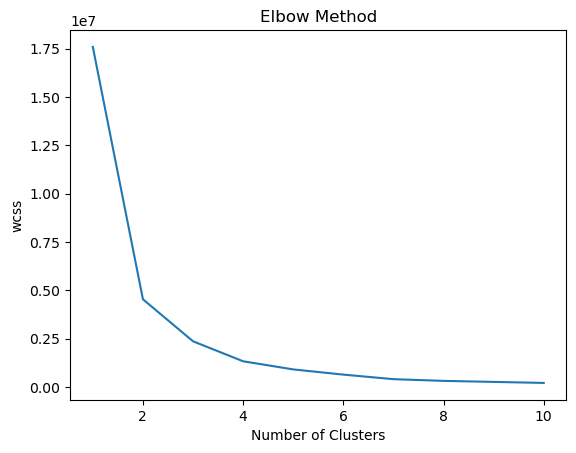

In [ ]:
kmeanscluster(x)

#### Clustering the dataset using optimum number of clusters by kmeans and plotting it

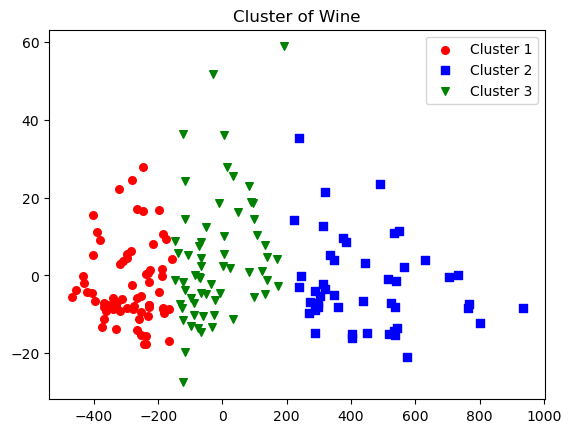

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(x)
plt.scatter(x[y_kmeans == 0,0], x[y_kmeans == 0,1], s = 30, c = 'red', label = 'Cluster 1', marker = 'o')
plt.scatter(x[y_kmeans == 1,0], x[y_kmeans == 1,1], s = 30, c = 'blue', label = 'Cluster 2', marker = 's')
plt.scatter(x[y_kmeans == 2,0], x[y_kmeans == 2,1], s = 30, c = 'green', label = 'Cluster 3', marker = 'v')
plt.title('Cluster of Wine')
plt.legend()
plt.show()

In [ ]:
data1['Cluster'] = kmeans.labels_
data1.head(10)

,PCA1,PCA2,Cluster
0,318.562979,21.492131,1
1,303.097420,-5.364718,1
2,438.061133,-6.537309,1
3,733.240139,0.192729,1
4,-11.571428,18.489995,2
5,703.231192,-0.332159,1
6,542.971581,-13.518967,1
7,548.401860,11.449432,1
8,298.036863,-8.180158,1
9,298.049553,-7.101543,1


In [ ]:
print('Silhouette score of kmeans before scaling =', silhouette_score(x, y_kmeans))

Silhouette score of kmeans before scaling = 0.5722554756855064


## Hierarchial Clustering

In [ ]:
import scipy.cluster.hierarchy as sch

In [ ]:
data2 = df.copy()

In [ ]:
def dendrogram(x):
    dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
    plt.title('Dendrogram')
    plt.ylabel('Euclidean Distance')
    plt.show()

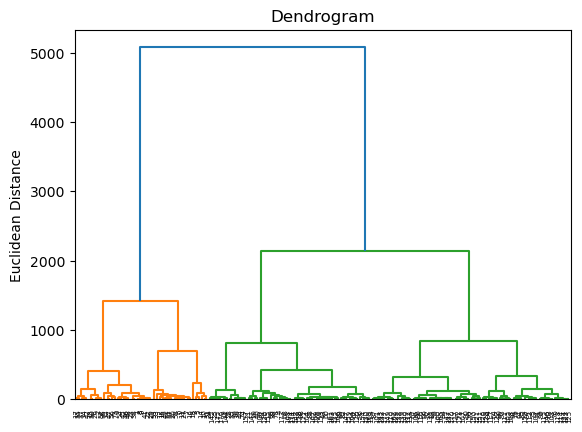

In [ ]:
dendrogram(x)

In [ ]:
from sklearn.cluster import AgglomerativeClustering

####  Clustering the dataset using optimum number of clusters by Agglomerative Clustering and plotting it

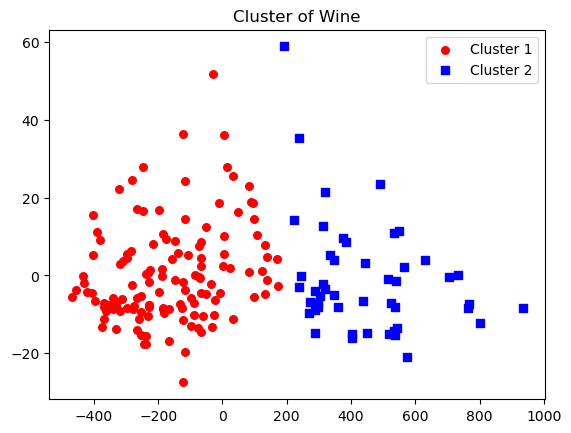

In [ ]:
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)
plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 30, c = 'red', label = 'Cluster 1', marker = 'o')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 30, c = 'blue', label = 'Cluster 2', marker = 's')
plt.title('Cluster of Wine')
plt.legend()
plt.show()

In [ ]:
data2['Cluster'] = hc.labels_
data2.head(10)

,PCA1,PCA2,Cluster
0,318.562979,21.492131,1
1,303.097420,-5.364718,1
2,438.061133,-6.537309,1
3,733.240139,0.192729,1
4,-11.571428,18.489995,0
5,703.231192,-0.332159,1
6,542.971581,-13.518967,1
7,548.401860,11.449432,1
8,298.036863,-8.180158,1
9,298.049553,-7.101543,1


In [ ]:
print('Silhouette score of Agglomerative Clustering before scaling =', silhouette_score(x, y_hc))

Silhouette score of Agglomerative Clustering before scaling = 0.6590718062960336


##DBSCAN Clustering




In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
data3 = df.copy()

In [ ]:
from sklearn.neighbors import NearestNeighbors

In [ ]:
def neighbors(x):
    neighbor = NearestNeighbors(n_neighbors = 5)
    nbrs = neighbor.fit(x)
    distances, index = nbrs.kneighbors(x)
    distances = np.sort(distances, axis = 0)
    dist = distances[:, 1]
    plt.plot(dist)
    plt.show()

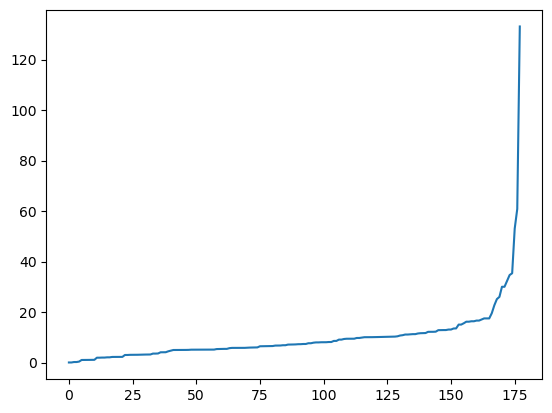

In [ ]:
neighbors(x)

In [ ]:
dbscan = DBSCAN(eps = 35, min_samples = 4)
y_db = dbscan.fit_predict(x)

In [ ]:
data3['Cluster'] = dbscan.labels_
data3.head(10)

,PCA1,PCA2,Cluster
0,318.562979,21.492131,0
1,303.097420,-5.364718,0
2,438.061133,-6.537309,-1
3,733.240139,0.192729,-1
4,-11.571428,18.489995,1
5,703.231192,-0.332159,-1
6,542.971581,-13.518967,2
7,548.401860,11.449432,2
8,298.036863,-8.180158,0
9,298.049553,-7.101543,0


In [ ]:
data3.Cluster.unique()

array([ 0, -1,  1,  2,  3], dtype=int64)

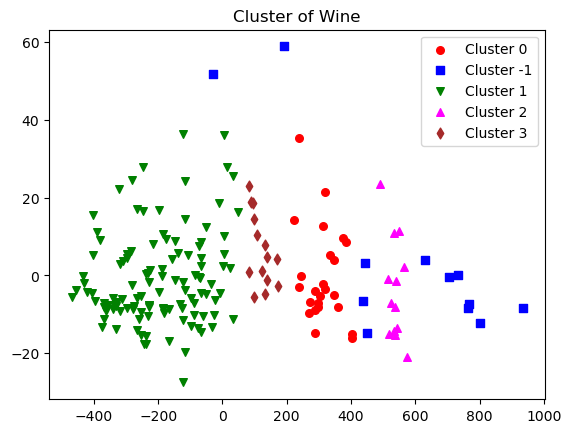

In [ ]:
plt.scatter(x[y_db == 0,0], x[y_db == 0,1], s = 30, c = 'red', label = 'Cluster 0', marker = 'o')
plt.scatter(x[y_db == -1,0], x[y_db == -1,1], s = 30, c = 'blue', label = 'Cluster -1', marker = 's')
plt.scatter(x[y_db == 1,0], x[y_db == 1,1], s = 30, c = 'green', label = 'Cluster 1', marker = 'v')
plt.scatter(x[y_db == 2,0], x[y_db == 2,1], s = 30, c = 'magenta', label = 'Cluster 2', marker = '^')
plt.scatter(x[y_db == 3,0], x[y_db == 3,1], s = 30, c = 'brown', label = 'Cluster 3', marker = 'd')
plt.title('Cluster of Wine')
plt.legend()
plt.show()

In [ ]:
print('Silhouette score of DBSCAN before scaling =', silhouette_score(x, y_db))

Silhouette score of DBSCAN before scaling = 0.44927187629502785
